# Correlation and Diversification #

George is a trading enthusiast. For several months now, he has been spending a considerable amount of time and money on the stock markets. He enjoys investing in stocks, but he admits he is not an expert. He has made very good money on some investments, but he has also lost money on others. He understands that some of the gains have offset some of the losses... George has discovered the benefits of diversification.

In [36]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Optimization
import statsmodels.api as sm 

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data

### Benefits of Diversification ###

In [37]:
tickers = get_tickers(mod="2.1")

tickers

['AMZN', 'MCD', 'WMT']

In [38]:
# Import data
df_returns = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    df_returns = pd.concat([df_returns, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for AMZN
Data Ready for MCD
Data Ready for WMT


In [39]:
df_returns

,AMZN,MCD,WMT
2015-01-05 00:00:00,-0.020731,-0.011106,-0.002915
2015-01-06 00:00:00,-0.023098,0.001841,0.007676
2015-01-07 00:00:00,0.010544,0.017275,0.026186
2015-01-08 00:00:00,0.006813,0.003716,0.020887
2015-01-09 00:00:00,-0.011818,-0.012262,-0.012457
...,...,...,...
2024-12-24 00:00:00,0.017573,0.009226,0.025462
2024-12-26 00:00:00,-0.008770,0.002751,0.001186
2024-12-27 00:00:00,-0.014641,-0.004011,-0.012253
2024-12-30 00:00:00,-0.011010,-0.013786,-0.011963


In [40]:
# Theoretically, we could use the average as the expected returns (these are daily returns)
expected_returns = df_returns.mean() * 252
expected_returns.name = 'annualized_returns'

expected_returns

AMZN    0.266007
MCD     0.139118
WMT     0.135187
Name: annualized_returns, dtype: float64

In [41]:
# The volatility is calculated with the standard deviations (also annualized volatility)
volatility = df_returns.dropna().std() * np.sqrt(252)
volatility.name = 'annualized_volatility'

volatility

AMZN    0.326594
MCD     0.203956
WMT     0.211232
Name: annualized_volatility, dtype: float64

In [42]:
# Covariance Matrix
cov_matrix = df_returns.dropna().cov() * 252

cov_matrix

,AMZN,MCD,WMT
AMZN,0.106664,0.018514,0.017503
MCD,0.018514,0.041598,0.013129
WMT,0.017503,0.013129,0.044619


In [44]:
# Create the Equal-Weighted Portfolio
n_assets = len(df_returns.columns)
weights = np.array([1/n_assets] * n_assets)  # Equal weights

weights

array([0.33333333, 0.33333333, 0.33333333])

In [45]:
# Portfolio expected return
portfolio_return = np.dot(weights, expected_returns)

# Portfolio variance and volatility
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print("\nPortfolio Expected Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)


Portfolio Expected Return: 0.18010392619156734
Portfolio Volatility: 0.17986852232932385


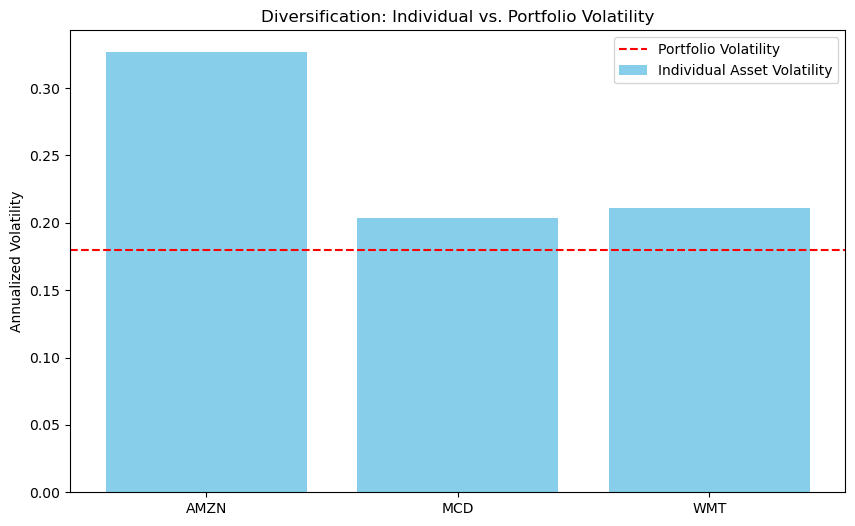

In [46]:
# Plot the Standard Deviations
plt.figure(figsize=(10, 6))
plt.bar(df_returns.columns, volatility, color='skyblue', label='Individual Asset Volatility')
plt.axhline(y=portfolio_volatility, color='red', linestyle='--', label='Portfolio Volatility')
plt.ylabel('Annualized Volatility')
plt.title('Diversification: Individual vs. Portfolio Volatility')
plt.legend()
plt.show()

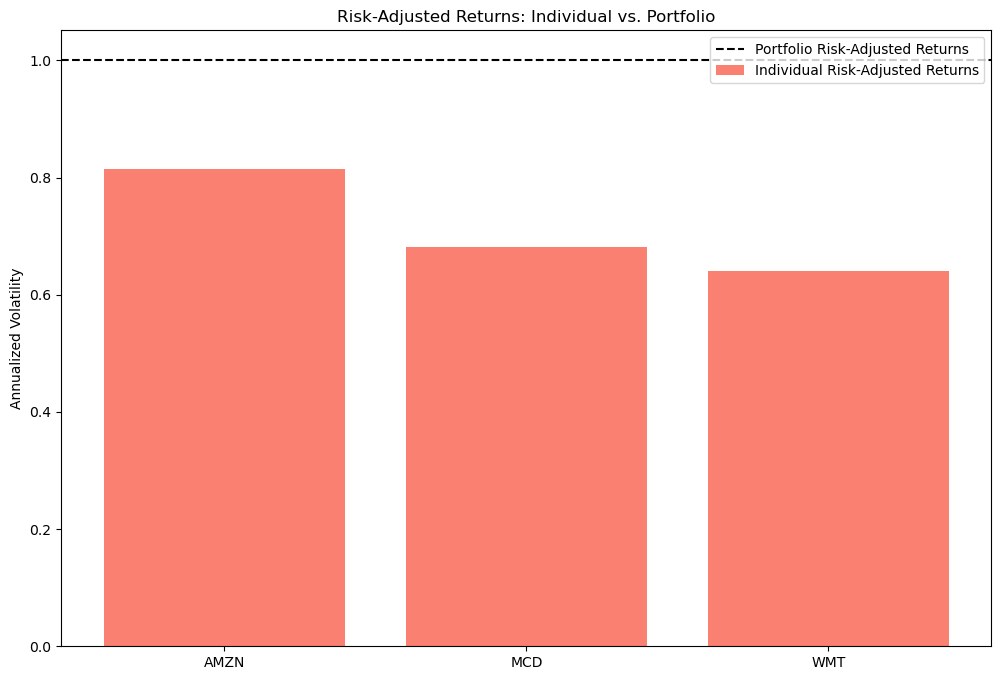

In [52]:
# Efficiency Ratios
eff_ratios = expected_returns/volatility
portafolio_effciency = portfolio_return/portfolio_volatility

plt.figure(figsize=(12, 8))
plt.bar(df_returns.columns, eff_ratios, color='salmon', label='Individual Risk-Adjusted Returns')
plt.axhline(y=portafolio_effciency, color='black', linestyle='--', label='Portfolio Risk-Adjusted Returns')
plt.ylabel('Annualized Volatility')
plt.title('Risk-Adjusted Returns: Individual vs. Portfolio')
plt.legend()
plt.show()

In [54]:
# Adjusted Returns
print(f"Portfolio Risk-Adjusted Returns: {portafolio_effciency}")
print(f"Stocks Risk-Adjusted Returns:\n{eff_ratios}")

Portfolio Risk-Adjusted Returns: 1.001308755190708
Stocks Risk-Adjusted Returns:
AMZN    0.814489
MCD     0.682096
WMT     0.639991
dtype: float64


### The Correlation ###

In [55]:
# Correlation is the Scale of Covariance [-1, 1]
pearson = df_returns.corr()

pearson

,AMZN,MCD,WMT
AMZN,1.000000,0.277949,0.253715
MCD,0.277949,1.000000,0.304747
WMT,0.253715,0.304747,1.000000


In [56]:
# Non-Linear Correlations
spearman = df_returns.corr(method='spearman')

spearman

,AMZN,MCD,WMT
AMZN,1.000000,0.279115,0.260898
MCD,0.279115,1.000000,0.336037
WMT,0.260898,0.336037,1.000000


In [57]:
# Let us get the Residual Returns (we show how to obtain them in Module 4)
res_returns = pd.read_csv(r'..\additional_data\capm_residual_returns.csv')
res_returns = res_returns.rename(columns={'Unnamed: 0': 'Date'})

res_returns = res_returns.set_index('Date')
res_returns.index = pd.to_datetime(res_returns.index)

# Just the stocks we need
res_returns = res_returns[df_returns.columns]
res_returns

,AMZN,MCD,WMT
Date,,,
2016-01-06,0.013342,0.004270,0.019232
2016-01-07,-0.012030,-0.003249,0.039127
2016-01-08,0.011077,0.007598,-0.015748
2016-01-11,0.016486,0.009695,0.010041
2016-01-12,-0.008771,-0.000192,-0.014574
...,...,...,...
2024-12-23,-0.010480,-0.007371,-0.022846
2024-12-24,0.000603,0.005305,0.022251
2024-12-26,-0.008039,0.002774,0.001172


In [58]:
res_returns.corr()

,AMZN,MCD,WMT
AMZN,1.000000,-0.140669,-0.013554
MCD,-0.140669,1.000000,0.060819
WMT,-0.013554,0.060819,1.000000


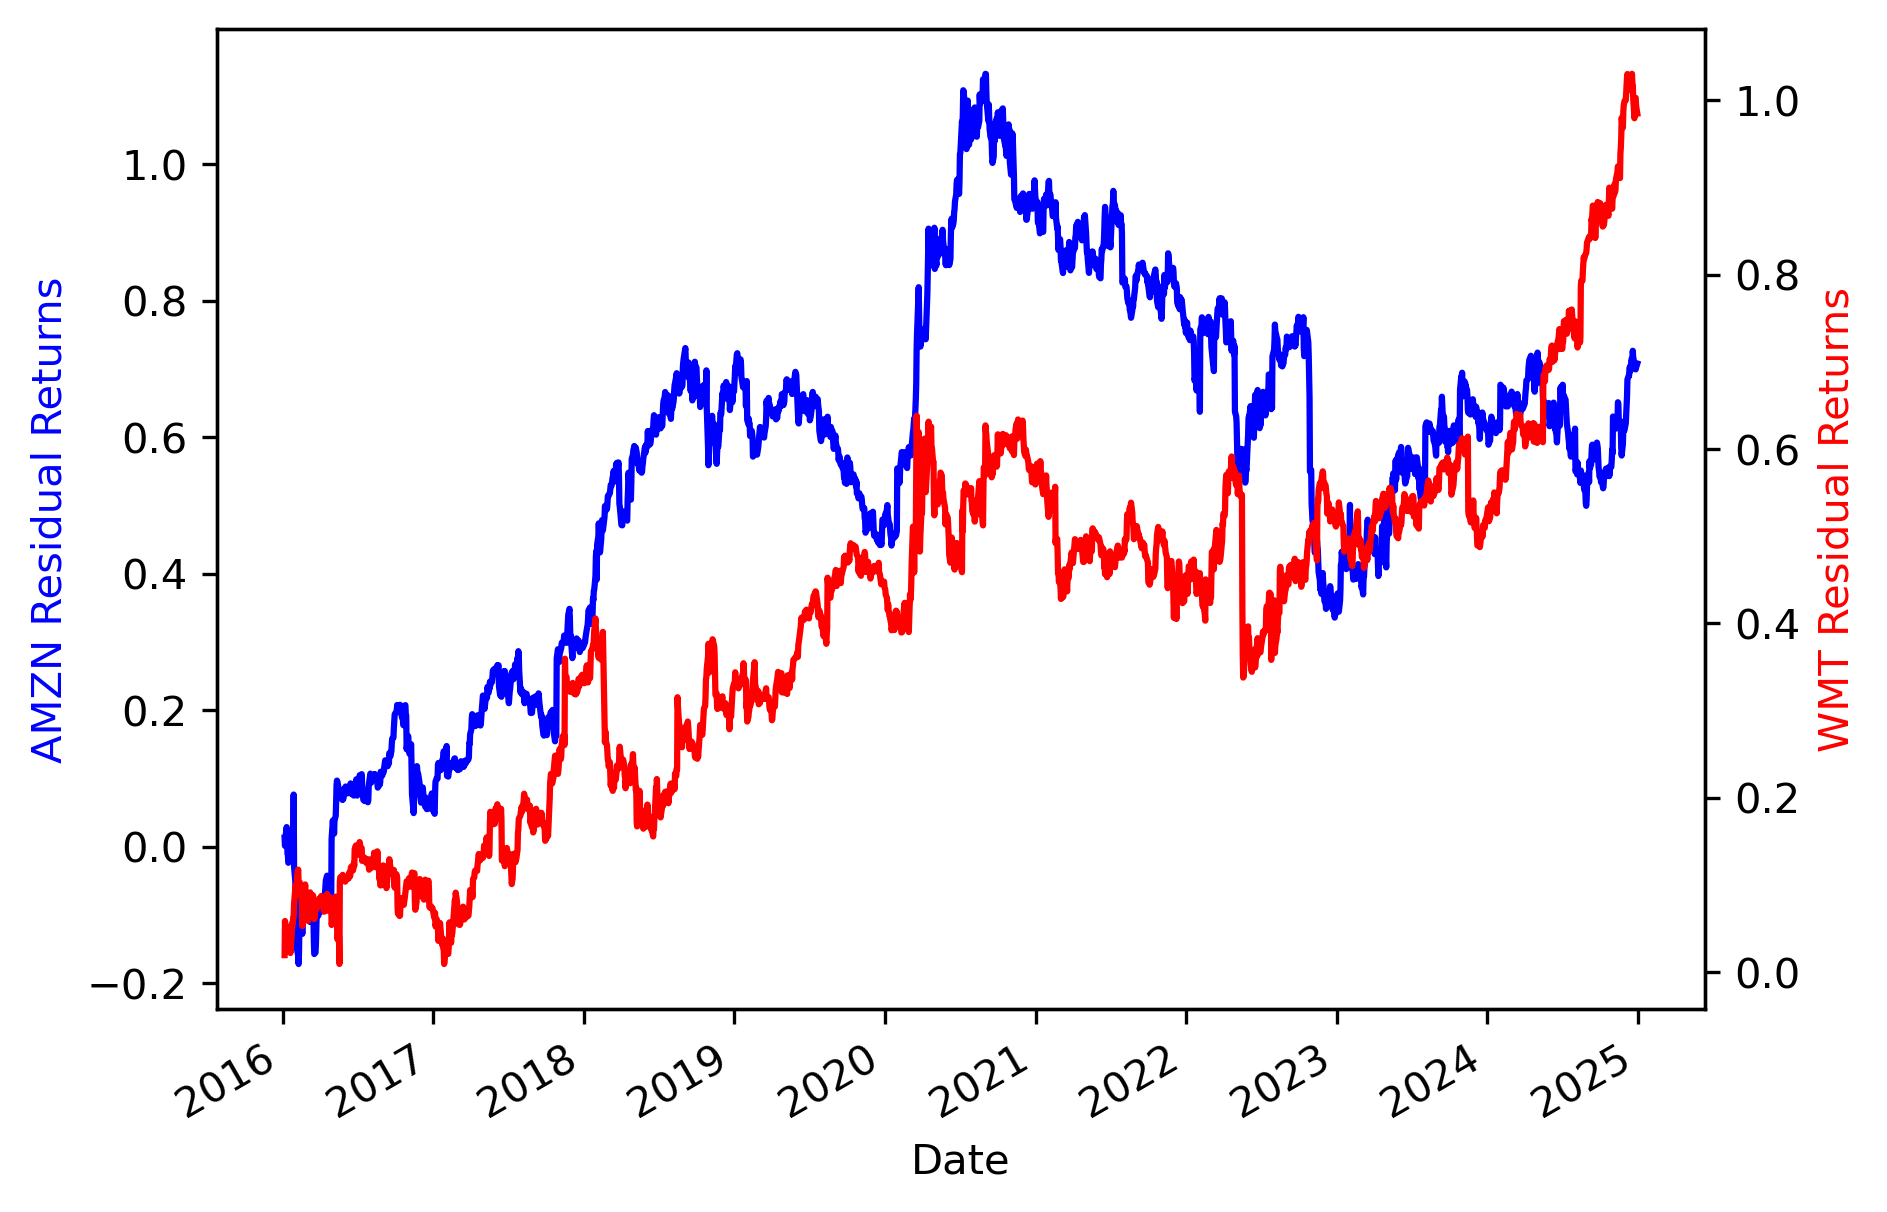

In [59]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# AMZN Residual Returns
res_returns['AMZN'].cumsum().plot(color = 'blue', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'AMZN Residual Returns', 
    color='blue'
    )

# WMT Residual Returns
ax2 = ax1.twinx()

res_returns['WMT'].cumsum().plot(color = 'red', ax = ax2)
ax2.set_ylabel(
    'WMT Residual Returns', 
    color='red'
    )

plt.show()

In [60]:
def detrending_series(
        y: pd.Series(),
        residuals=True
):
    Y = y.dropna()

    trend = pd.Series(
        np.arange(1, len(Y) + 1),
        index=Y.index
    )

    models = [
        sm.OLS(Y, sm.add_constant(np.ones_like(Y))),
        sm.OLS(Y, sm.add_constant(trend)),
        sm.OLS(Y, sm.add_constant(pd.DataFrame({"trend": trend, "trend_sq": trend ** 2}))),
        # sm.OLS(Y, sm.add_constant(pd.DataFrame({"trend": trend, "trend_sq": trend ** 2, "trend_cb": trend ** 3}))),
        # sm.OLS(Y, sm.add_constant(
        #    pd.DataFrame({"trend": trend, "trend_sq": trend ** 2, "trend_cb": trend ** 3, "trend_qua": trend ** 4}))),
    ]

    results = [model.fit() for model in models]
    aics = [result.aic for result in results]

    best_model_index = np.argmin(aics)
    best_result = results[best_model_index]

    # print(best_result.summary())

    if residuals:
        return best_result.resid

    else:
        return best_result.fittedvalues

In [62]:
# Let us detrend
cumsum_detrended = res_returns.cumsum().apply(detrending_series)

cumsum_detrended

,AMZN,MCD,WMT
Date,,,
2016-01-06,0.138901,0.026284,-0.033112
2016-01-07,0.125550,0.022619,0.005632
2016-01-08,0.135306,0.029801,-0.010500
2016-01-11,0.150473,0.039080,-0.000842
2016-01-12,0.140383,0.038472,-0.015799
...,...,...,...
2024-12-23,0.271364,-0.025924,0.290013
2024-12-24,0.272789,-0.020517,0.312080
2024-12-26,0.265572,-0.017640,0.313066


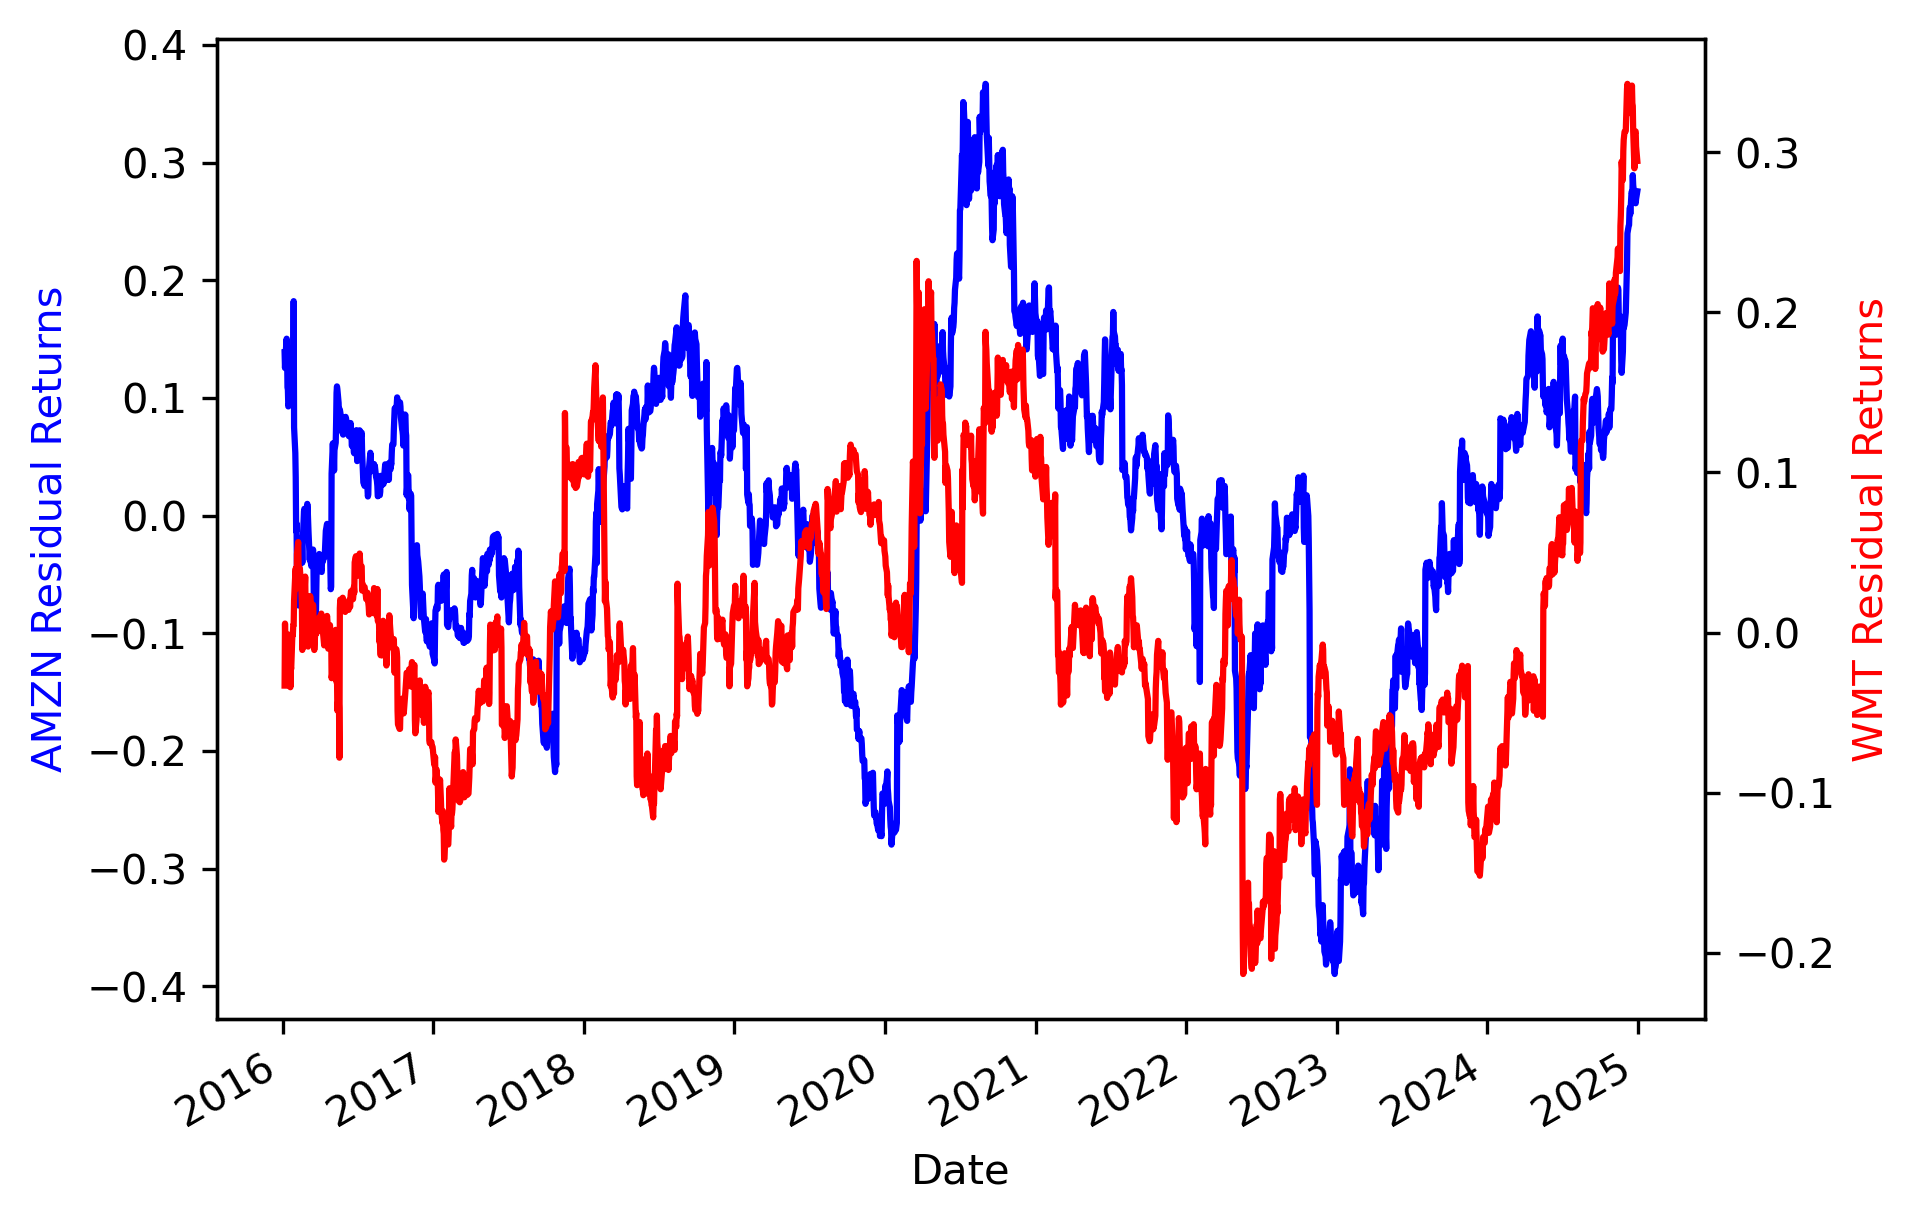

In [63]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# AMZN Residual Returns
cumsum_detrended['AMZN'].plot(color = 'blue', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'AMZN Residual Returns', 
    color='blue'
    )

# WMT Residual Returns
ax2 = ax1.twinx()

cumsum_detrended['WMT'].plot(color = 'red', ax = ax2)
ax2.set_ylabel(
    'WMT Residual Returns', 
    color='red'
    )

plt.show()

In [64]:
# Before 2020: all data up to 2019-12-31
corr_before_2020 = cumsum_detrended['AMZN'].loc[:'2019-12-31'].corr(
    cumsum_detrended['WMT'].loc[:'2019-12-31'])

# After 2020: all data from 2020-01-01 onwards
corr_after_2020 = cumsum_detrended['AMZN'].loc['2020-01-01':].corr(
    cumsum_detrended['WMT'].loc['2020-01-01':])

print(f"The correlation between AMZN and WMT before 2020: {corr_before_2020}")
print(f"The correlation between AMZN and WMT after 2020: {corr_after_2020}")

The correlation between AMZN and WMT before 2020: -0.3105361048930947
The correlation between AMZN and WMT after 2020: 0.600689408966034


In [65]:
# Calculate Rolling Correlation

rolling_corr_252d_cumsum = cumsum_detrended['AMZN'].rolling(window=252).corr(cumsum_detrended['WMT'])
rolling_corr_252d = res_returns['AMZN'].rolling(window=252).corr(res_returns['WMT'])

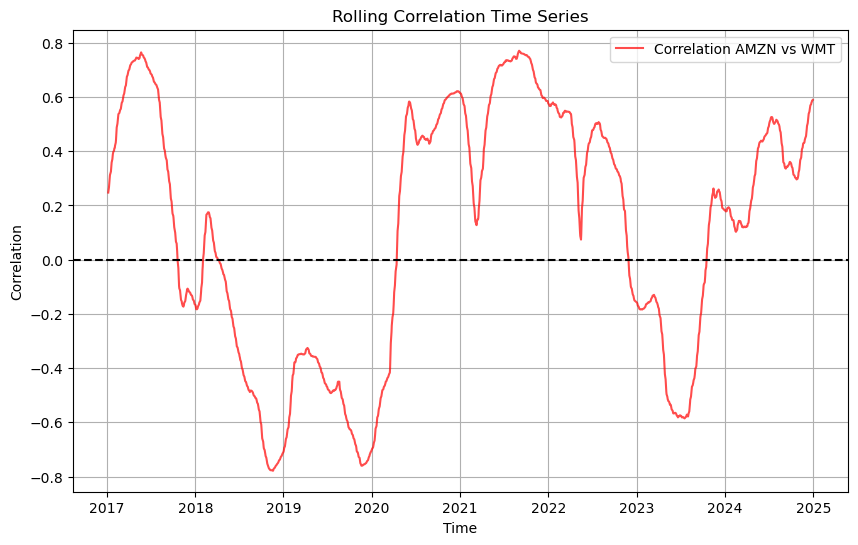

In [66]:
# Plot Residuals

# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr_252d_cumsum, label='Correlation AMZN vs WMT', color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Rolling Correlation Time Series')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid()

# Show
plt.show()

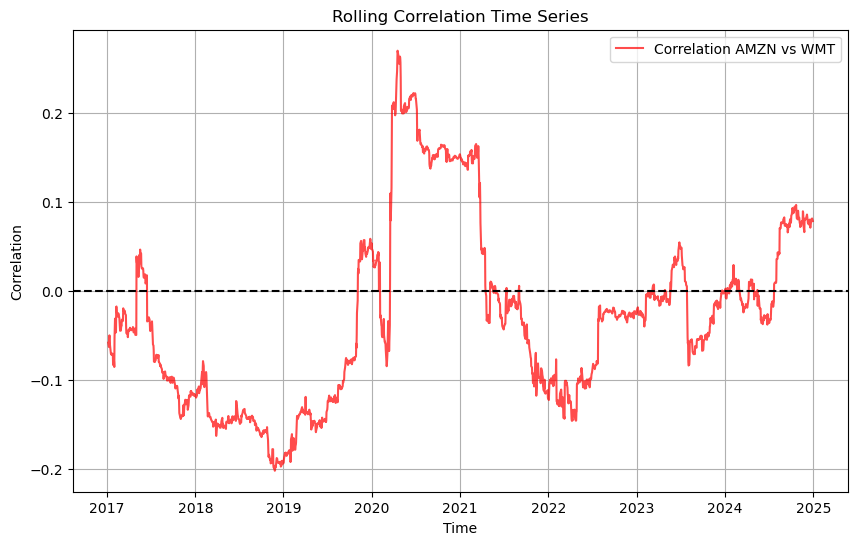

In [67]:
# Plot Residuals

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr_252d, label='Correlation AMZN vs WMT', color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Rolling Correlation Time Series')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid()

# Show
plt.show()

In [68]:
def portfolio_variance(
    weights, 
    returns
):
    weights = np.array(weights)
    if isinstance(returns, pd.DataFrame):
        returns = returns.values
    
    cov_matrix = np.cov(returns.T)  # covariance matrix
    port_var = weights.T @ cov_matrix @ weights
    return port_var

In [69]:
# Create the portfolio
portfolio_df = df_returns[['AMZN', 'WMT']]
weights = [0.5, 0.5]

port_var = portfolio_variance(
    weights,
    portfolio_df.mul(100)
)

print(f'Portfolio Variance: {port_var:.4f}')

Portfolio Variance: 1.8481


In [70]:
# Define the function for the rolling portfolio variance
def rolling_portfolio_variance(returns_df, weights, window=252):
    weights = np.array(weights)

    rolling_vars = []
    index = returns_df.index

    for i in range(window - 1, len(returns_df)):
        window_returns = returns_df.iloc[i - window + 1 : i + 1]
        cov_matrix = np.cov(window_returns.T)
        var = weights.T @ cov_matrix @ weights
        rolling_vars.append(var)

    result = pd.Series([np.nan] * (window - 1) + rolling_vars, index=index)
    return result


In [71]:
# Calculate the Rolling Variance

rolling_var = rolling_portfolio_variance(portfolio_df, weights)
rolling_var = rolling_var * 100

rolling_var.dropna()

2016-01-04    0.018415
2016-01-05    0.018378
2016-01-06    0.018352
2016-01-07    0.018266
2016-01-08    0.018266
                ...   
2024-12-24    0.012740
2024-12-26    0.012750
2024-12-27    0.012842
2024-12-30    0.012910
2024-12-31    0.012916
Length: 2264, dtype: float64

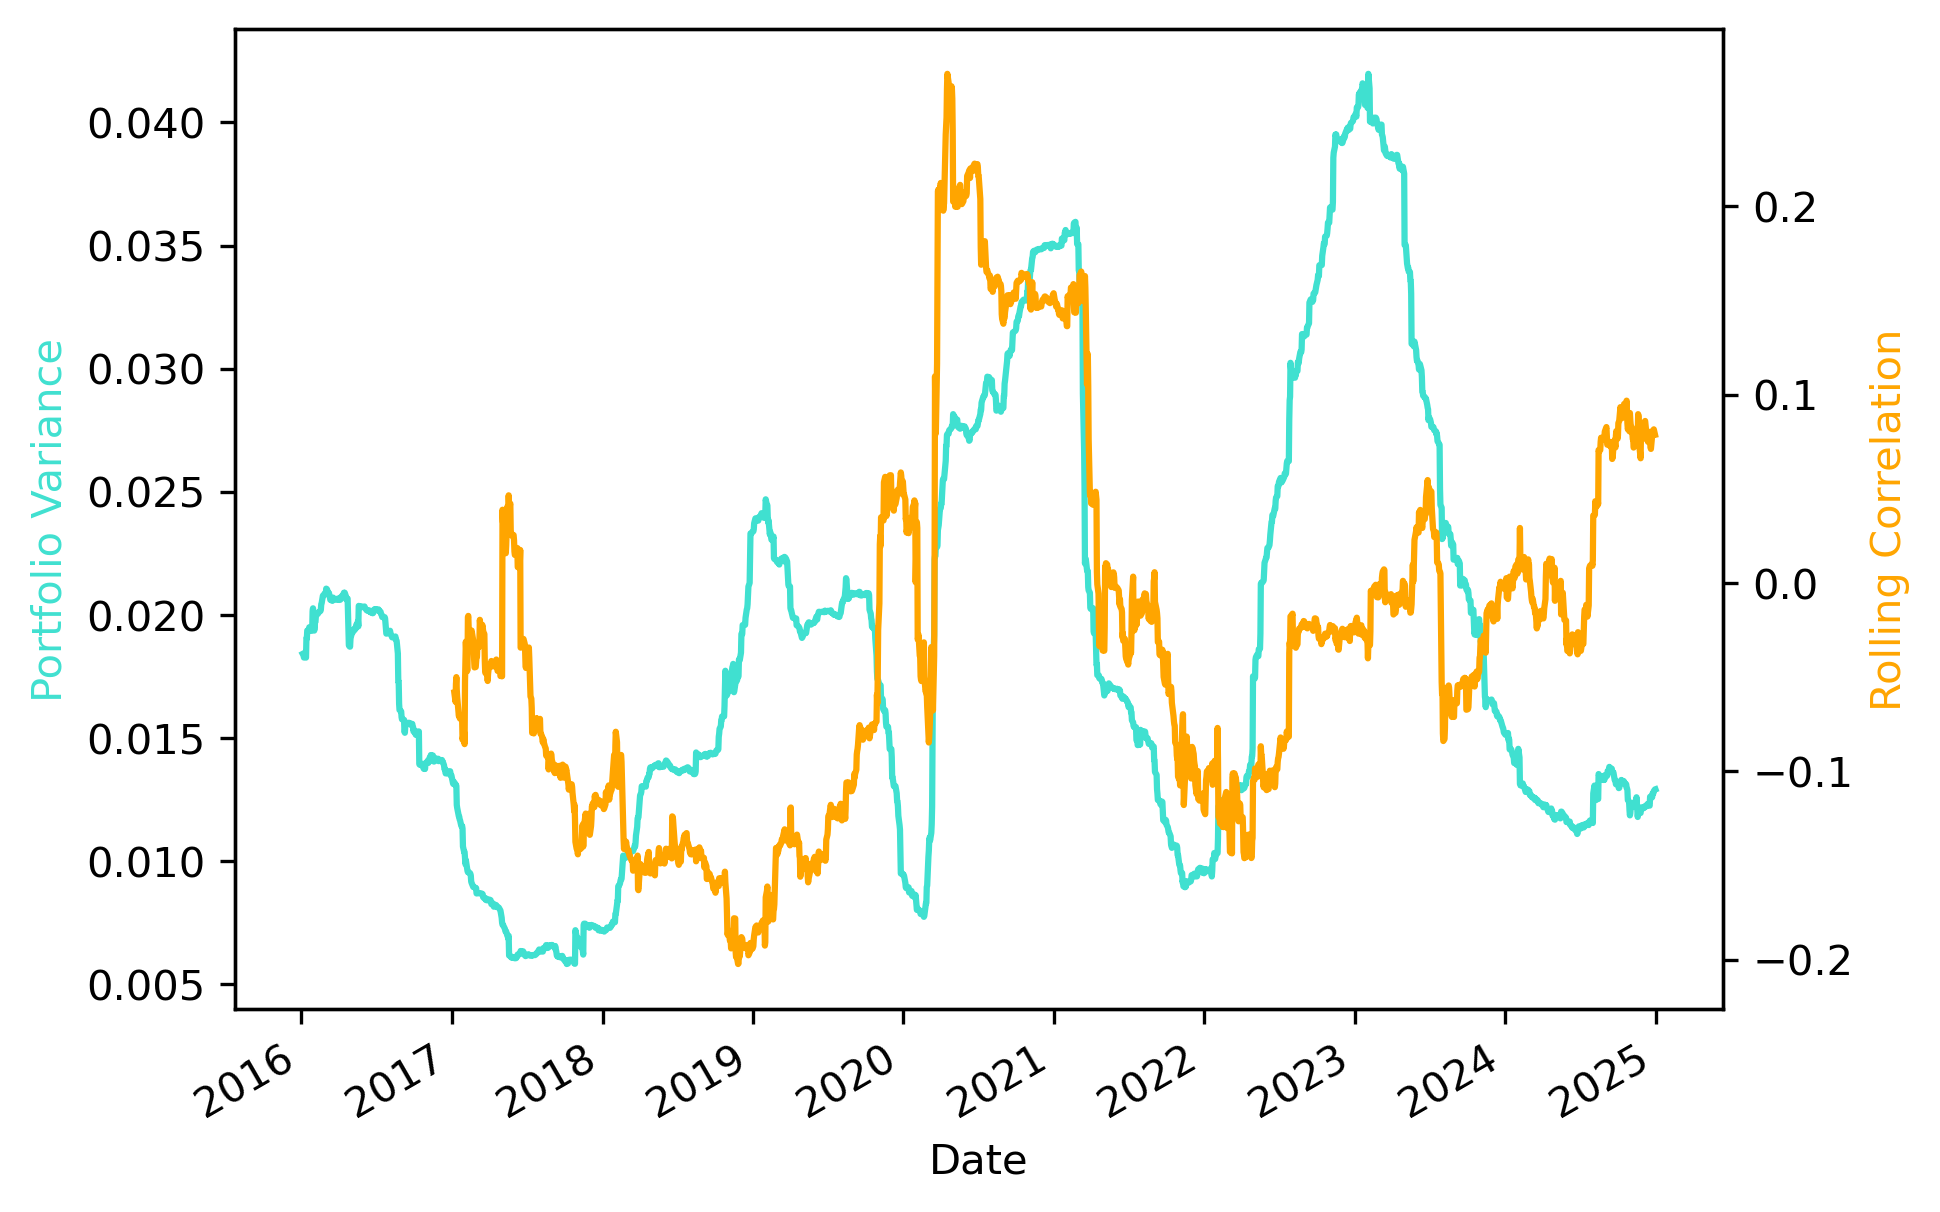

In [72]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# Portfolio Variance
rolling_var.dropna().plot(color = 'turquoise', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'Portfolio Variance', 
    color='turquoise'
    )

# Rolling Correlation
ax2 = ax1.twinx()

rolling_corr_252d.plot(color = 'orange', ax = ax2)
ax2.set_ylabel(
    'Rolling Correlation', 
    color='orange'
    )

plt.show()